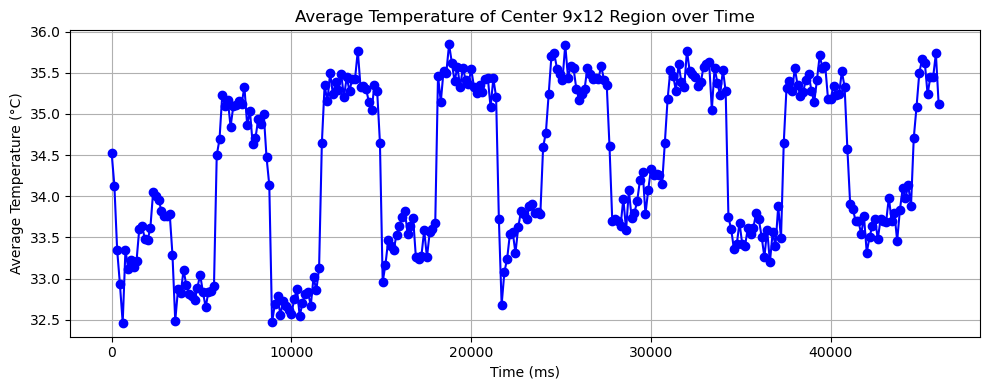

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 替换为你真实的 pkl 文件路径
pkl_path = "/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_sst/ira0/data_20250407_162624.pkl"

# 读取 pkl 文件
with open(pkl_path, 'rb') as f:
    temperature_frames = pickle.load(f)

# 帧率与时间间隔
fps_values = [6.43, 6.47, 6.50, 6.53, 6.56]
avg_fps = sum(fps_values) / len(fps_values)
time_interval_ms = 1000 / avg_fps  # 每帧时间间隔（毫秒）

# ✅ 设置你希望截取的时间段（单位：毫秒）
start_time_ms = 1000   # 从 1000ms 开始
end_time_ms = 5000     # 到 5000ms 结束

# 计算对应的帧范围
start_frame = int(start_time_ms / time_interval_ms)
# end_frame = int(end_time_ms / time_interval_ms)
# end_frame = int(end_time_ms / time_interval_ms)

# 提取中心区域的平均温度
avg_temp_per_frame = []
for frame in temperature_frames[start_frame:end_frame]:
    center_region = frame[7:17, 11:21]  # 中心 10x10 区域（24x32）
    avg_temp = np.mean(center_region[center_region > 0])
    avg_temp_per_frame.append(avg_temp)

# 构造时间轴
num_frames = len(avg_temp_per_frame)
time_axis = np.arange(start_time_ms, start_time_ms + num_frames * time_interval_ms, time_interval_ms)

# 画图
plt.figure(figsize=(10, 4))
plt.plot(time_axis, avg_temp_per_frame, marker='o', linestyle='-', color='blue')
plt.title("Average Temperature of Center 10x10 Region over Time")
plt.xlabel("Time (ms)")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


16*12

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def process_and_plot_temperature(pkl_path, sensor_type=0, start_time_ms=None, end_time_ms=None):
    # sensor_type: 0 for 24x32, 1 for 12x16
    if sensor_type == 0:
        fps_list = [6.43, 6.47, 6.50, 6.53, 6.56]
        center_size = (10, 10)
    elif sensor_type == 1:
        fps_list = [15.43, 15.47, 15.50, 15.53, 15.56]
        center_size = (5, 5)
    else:
        raise ValueError("sensor_type must be 0 (24x32) or 1 (12x16)")

    # 读取数据
    with open(pkl_path, 'rb') as f:
        temperature_frames = pickle.load(f)

    avg_fps = sum(fps_list) / len(fps_list)
    time_interval_ms = 1000 / avg_fps
    total_frames = len(temperature_frames)

    # 获取帧尺寸
    h, w = temperature_frames[0].shape
    ch, cw = center_size
    start_row = h // 2 - ch // 2
    end_row = start_row + ch
    start_col = w // 2 - cw // 2
    end_col = start_col + cw

    # 提取中心区域平均温度
    avg_temp_per_frame = []
    for frame in temperature_frames:
        center_region = frame[start_row:end_row, start_col:end_col]
        avg_temp = np.mean(center_region[center_region > 0])
        avg_temp_per_frame.append(avg_temp)

    # 构造时间轴
    time_axis = np.arange(0, total_frames * time_interval_ms, time_interval_ms)

    if start_time_ms is None:
    # ✅ Step 1: the full data
        plt.figure(figsize=(10, 4))
        plt.plot(time_axis, avg_temp_per_frame, marker='o', color='blue')
        plt.title(f"Full Data: Avg Temp (Sensor {sensor_type}, fps={avg_fps:.2f})")
        plt.xlabel("Time (ms)")
        plt.ylabel("Average Temperature (°C)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # ✅ Step 2: if you want to clip the data, then set the start_time_ms and end_time_ms
    if start_time_ms is not None:
        start_frame = int(start_time_ms / time_interval_ms)
        end_frame = int(end_time_ms / time_interval_ms) if end_time_ms else total_frames

        clip_temp = avg_temp_per_frame[start_frame:end_frame]
        clip_time = time_axis[start_frame:end_frame]

        plt.figure(figsize=(10, 4))
        plt.plot(clip_time, clip_temp, marker='o', linestyle='-', color='blue')
        plt.title(f"Clipped: Avg Temp ({start_time_ms}ms - {clip_time[-1]:.0f}ms)")
        plt.xlabel("Time (ms)")
        plt.ylabel("Average Temperature (°C)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        



SST

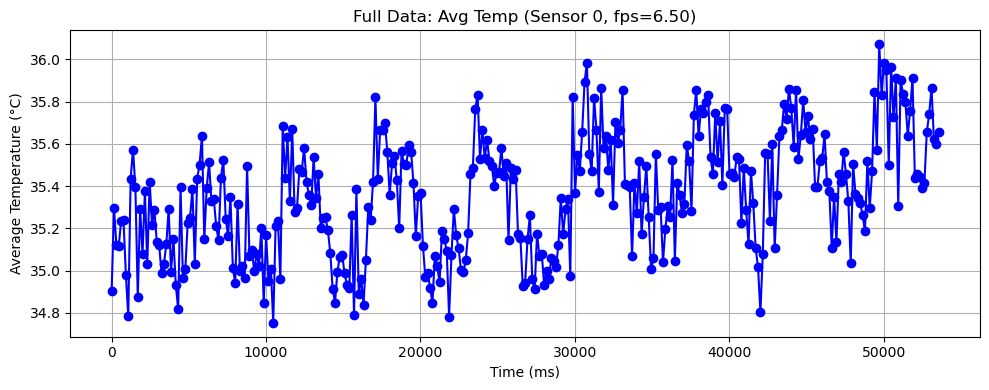

In [48]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_sst/ira0/data_20250407_162439.pkl",
    sensor_type=0,
)

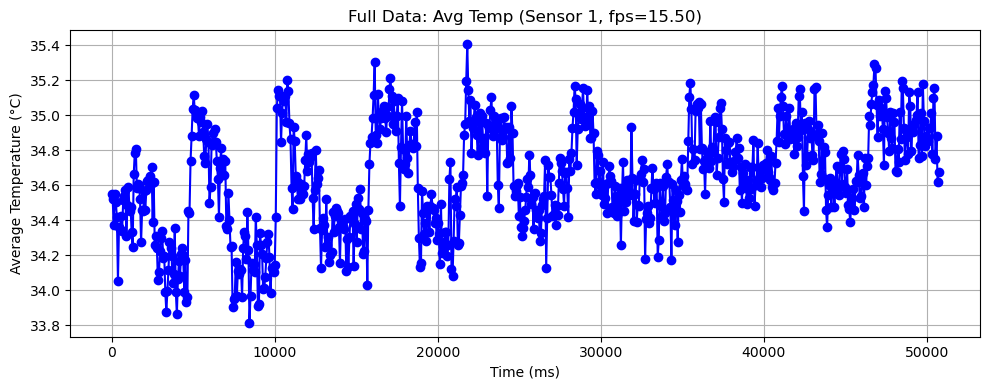

In [45]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_sst/ira1/data_20250407_162439.pkl",
    sensor_type=1,
)

有头发挡住了

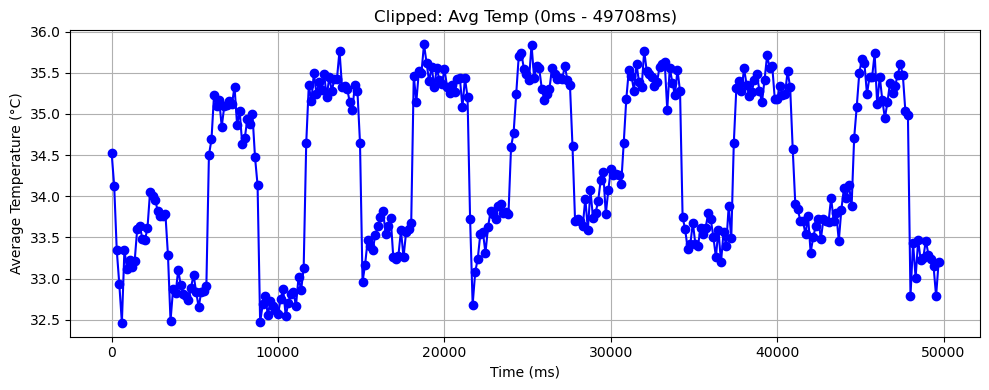

In [58]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_sst/ira0/data_20250407_162624.pkl",
    sensor_type=0,
    start_time_ms=0,
    end_time_ms=50000,
)

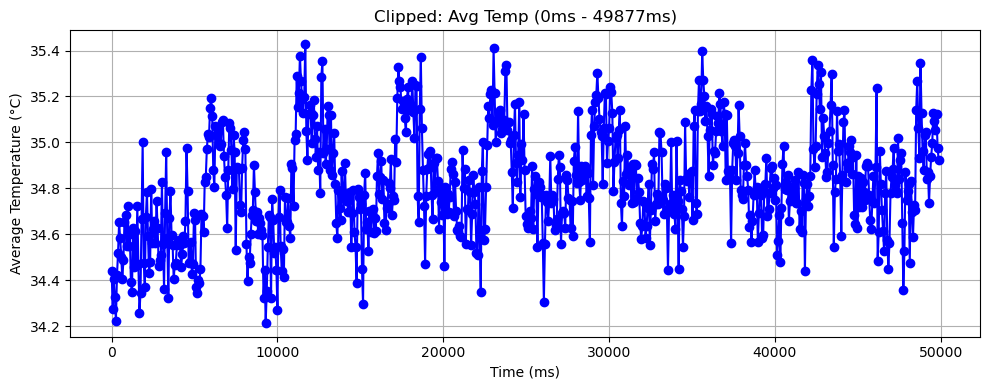

In [60]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_sst/ira1/data_20250407_162624.pkl",
    sensor_type=1,
    start_time_ms=0,
    end_time_ms=50000,
)

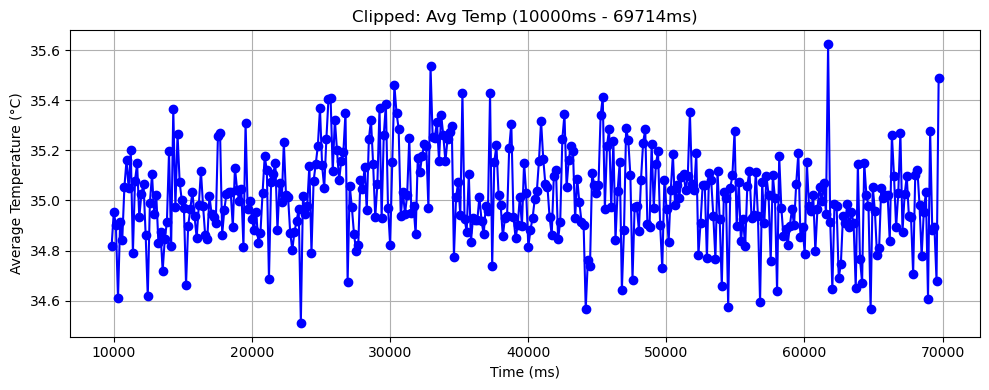

In [4]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_sst/ira0/data_20250407_162852.pkl",
    sensor_type=0,
    start_time_ms=10000,
    end_time_ms=70000,
)

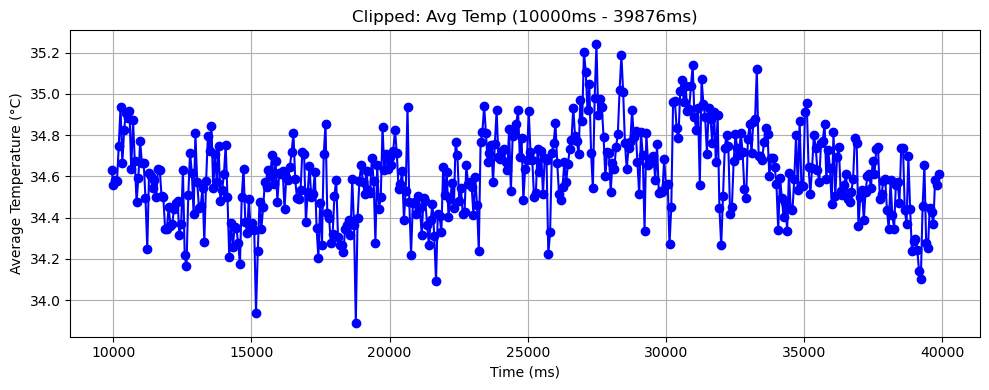

In [70]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_sst/ira1/data_20250407_162852.pkl",
    sensor_type=1,
    start_time_ms=10000,
    end_time_ms=40000,
)

UU

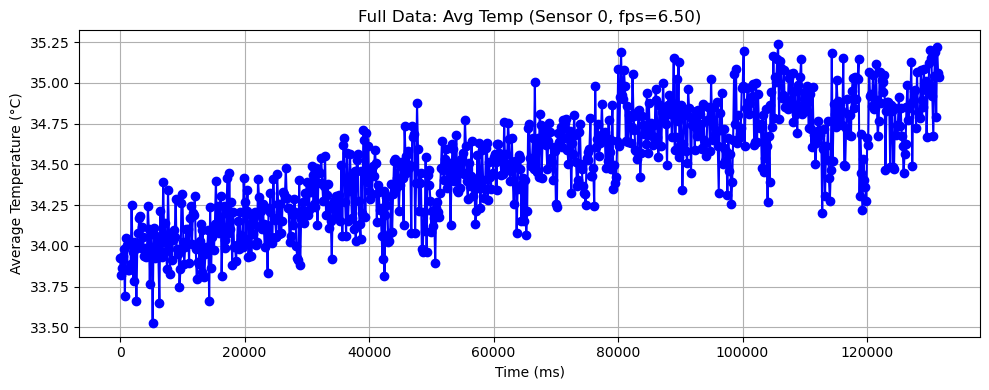

In [5]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_uu/ira0/data_20250407_160801.pkl",
    sensor_type=0,
    # start_time_ms=40000,
    # end_time_ms=90000,
)

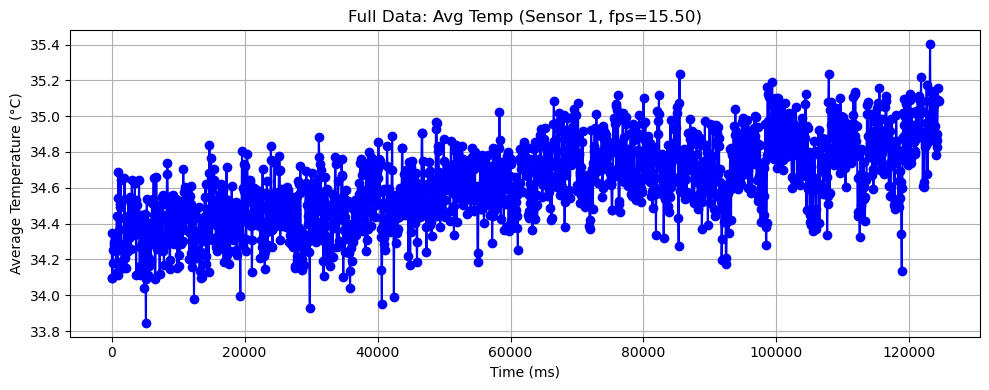

In [6]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_uu/ira1/data_20250407_160801.pkl",
    sensor_type=1,
    # start_time_ms=40000,
    # end_time_ms=70000,
)

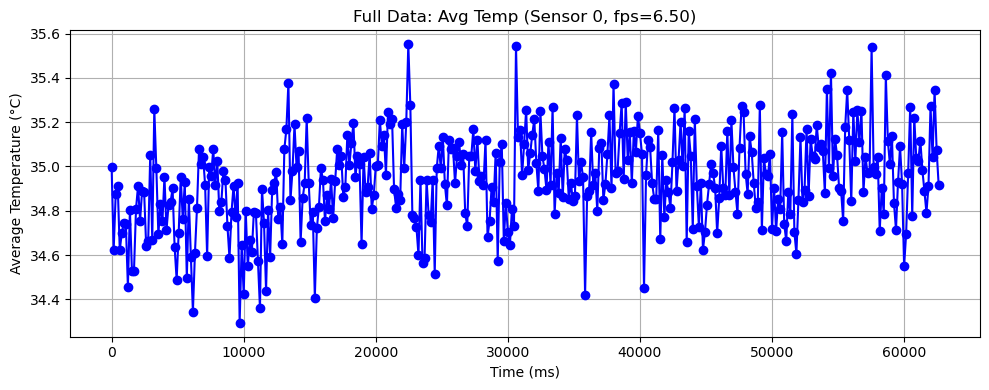

In [75]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_uu/ira0/data_20250407_161202.pkl",
    sensor_type=0,
)

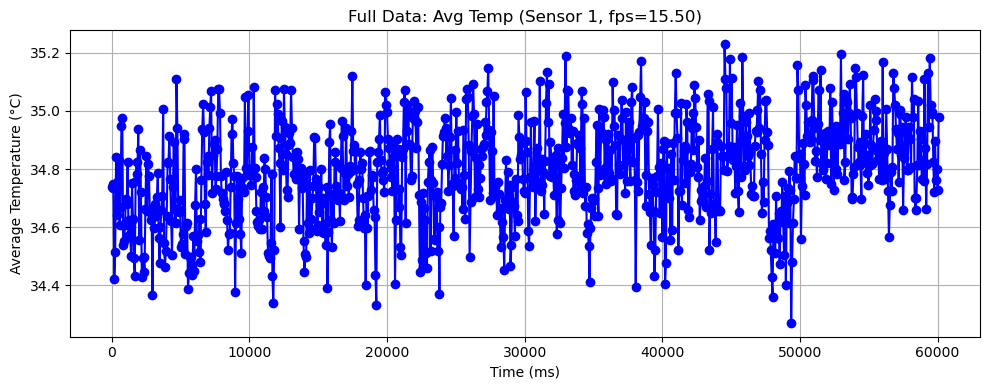

In [76]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_uu/ira1/data_20250407_161202.pkl",
    sensor_type=1,
)

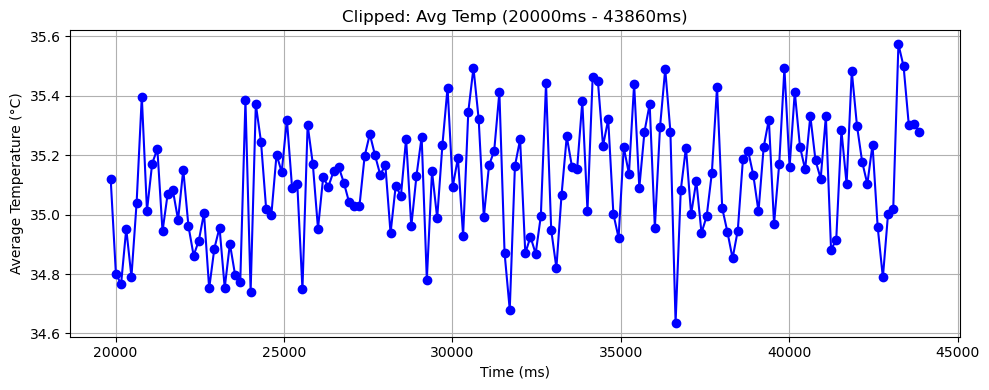

In [89]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_uu/ira0/data_20250407_161427.pkl",
    sensor_type=0,
    start_time_ms=20000,
    end_time_ms=50000,
)

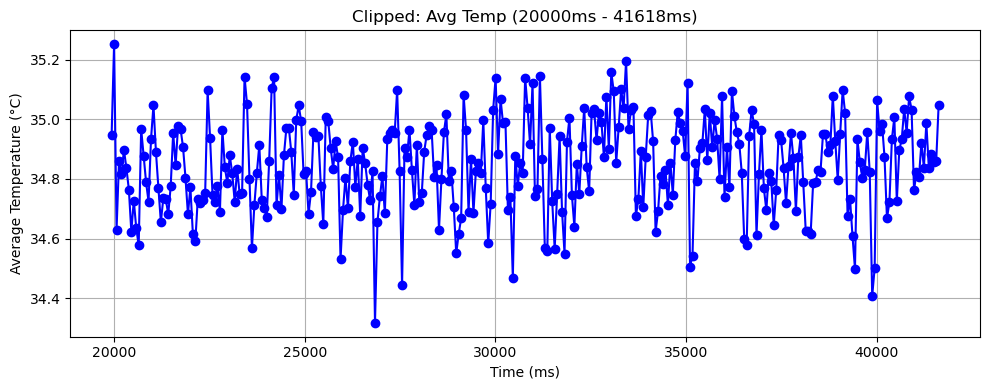

In [82]:
process_and_plot_temperature(
    pkl_path="/Users/yvonne/Documents/final project/ThermalEye/ira_data/0407_uu/ira1/data_20250407_161427.pkl",
    sensor_type=1,
    start_time_ms=20000,
    end_time_ms=50000,
)

In [ ]:
process_and_plot_temperature(
    pkl_path="",
    sensor_type=1,
)